In [3]:
# install cogcom-nlpy 
!pip install ccg_nlpy 

# might need too 
!pip install google 
!pip install protobuf 

In [4]:
import urllib2 

In [5]:
speeches = urllib2.urlopen("https://raw.githubusercontent.com/ryanmcdermott/trump-speeches/master/speeches.txt")
speechText = speeches.read()

In [6]:
print speechText[0:1000]

﻿SPEECH 1


...Thank you so much.  That's so nice.  Isn't he a great guy.  He doesn't get a fair press; he doesn't get it.  It's just not fair.  And I have to tell you I'm here, and very strongly here, because I have great respect for Steve King and have great respect likewise for Citizens United, David and everybody, and tremendous resect for the Tea Party.  Also, also the people of Iowa.  They have something in common.  Hard-working people.  They want to work, they want to make the country great.  I love the people of Iowa.  So that's the way it is.  Very simple.
With that said, our country is really headed in the wrong direction with a president who is doing an absolutely terrible job.  The world is collapsing around us, and many of the problems we've caused.  Our president is either grossly incompetent, a word that more and more people are using, and I think I was the first to use it, or he has a completely different agenda than you want to know about, which could be possible


In [7]:
# create a pipeline instance 
from ccg_nlpy import remote_pipeline 
# Default 
p = remote_pipeline.RemotePipeline()
# But I use my local pipeline
p = remote_pipeline.RemotePipeline(server_api = 'http://austen.cs.illinois.edu:5800')

INFO:ccg_nlpy.pipeline_config:Using pipeline web server with API: http://austen.cs.illinois.edu:8080
INFO:ccg_nlpy.remote_pipeline:pipeline has been set up
INFO:ccg_nlpy.pipeline_config:Using pipeline web server with API: http://austen.cs.illinois.edu:5800
INFO:ccg_nlpy.remote_pipeline:pipeline has been set up


In [10]:
import operator 

# a map from surface strings to their counts 
ner_map = {}

for d in speechText.splitlines():
    if d.strip() == "": 
        continue
    # create a pipeline document using raw string 
    doc = p.doc(d)
    
    # extract ner view 
    ner_view = doc.get_ner_conll
    if ner_view != None and ner_view.get_cons() != None: 
        for ner_ins  in ner_view.get_cons(): 
            tok = ner_ins['tokens'] 
            if tok in ner_map: 
                ner_map[tok] += 1
            else: 
                ner_map[tok] = 1
    
# sort the elements of the map 
sorted_ner_map = sorted(ner_map.items(), key=operator.itemgetter(1), reverse = True)


# expected output: 
sorted_ner_map = [(u'China', 189), (u'Trump', 166), (u'America', 160), (u'Mexico', 152), (u'Iowa', 116), (u'United States', 112), (u'Obama', 106), (u'Hillary Clinton', 92), (u'Iran', 89), (u'Israel', 80), (u'American', 76), (u'Iraq', 69), (u'Japan', 64), (u'Hillary', 59), (u'ISIS', 58), (u'Florida', 52), (u'New Hampshire', 44), (u'Middle East', 43), (u'Americans', 43), (u'Donald Trump', 35), (u'Democrats', 35), (u'Republicans', 35), (u'Obamacare', 34), (u'South Carolina', 34), (u'Islamic', 34), (u'Hispanics', 32), (u'Paris', 30), (u'Cruz', 29), (u'Syria', 29), (u'Indiana', 28), (u'CNN', 28), (u'New York', 27), (u'Washington', 27), (u'Bush', 27), (u'OK', 27), (u'Jeb', 26), (u'South Korea', 25), (u'Social Security', 25), (u'Ford', 24), (u'Wisconsin', 24), (u'Saudi Arabia', 23), (u'Ivanka', 23), (u'Ted', 21), (u'Nevada', 20), (u'White House', 20), (u'US', 20), (u'NATO', 19), (u'Islam', 19), (u'Texas', 19), (u'Medicare', 19), (u'Republican', 19), (u'NAFTA', 19), (u'Clinton', 18), (u'Ted Cruz', 18), (u'Marco', 17), (u'California', 17), (u'Republican Party', 16), (u'Germany', 16), (u'NBC', 16), (u'Bergdahl', 15), (u'Carl Icahn', 15), (u'Ben Carson', 15), (u'Jeb Bush', 15), (u'Russia', 15), (u'America First', 14), (u'Christians', 14), (u'Chicago', 14), (u'Fox', 14), (u'Libya', 13), (u'Tennessee', 13), (u'Common Core', 13), (u'Donald', 13), (u'Rubio', 13), (u'Yemen', 13), (u'Ben', 13), (u'Muslim', 12), (u'Boeing', 12), (u'Orlando', 12), (u'The Apprentice', 12), (u'Trump Tower', 12), (u'Christian', 12), (u'Mexican', 12), (u'Tea Party', 11), (u'Merry Christmas', 11), (u'Kasich', 11), (u'Ohio', 11), (u'Putin', 11), (u'Mitt Romney', 11), (u'Jewish', 11), (u'Alabama', 11), (u'Los Angeles', 11), (u'Melania', 11), (u'Nashville', 11), (u'Oh', 11), (u'Chris', 11), (u'San Bernardino', 11), (u'Joe', 10), (u'New Jersey', 10), (u'Afghanistan', 10), (u'France', 10), (u'Pennsylvania', 10), (u'San Francisco', 10), (u'Nabisco', 10), (u'Carl', 10), (u'Walker', 10), (u'Mike Pence', 9), (u'John Deere', 9), (u'Romney', 9), (u'Jeff Sessions', 9), (u'SPEECH', 9), (u'Caterpillar', 9), (u'World Trade Center', 9), (u'God', 9), (u'New York Times', 9), (u'North Korea', 9), (u'Beada', 8), (u'Chinese', 8), (u'Muslims', 8), (u'Michigan', 8), (u'Hispanic', 8), (u'Veterans Administration', 8), (u'Bible', 8), (u'Georgia', 8), (u'Wall Street Journal', 8), (u'Senate', 8), (u'TPP', 8), (u'Monmouth', 8), (u'Cold War', 8), (u'Manhattan', 8), (u'George', 7), (u'Ukraine', 7), (u'Christie', 7), (u'Marco Rubio', 7), (u'Washington Bridge', 7), (u'Jared', 7), (u'Bernie Sanders', 7), (u'Atlantic City', 7), (u'Pennsylvania Avenue', 7), (u'Art of the Deal', 7), (u'Keystone Pipeline', 7), (u'Simon', 7), (u'Kate', 7), (u'Doral', 7), (u'Tom Brady', 7), (u'YOU LOOK', 7), (u'Radical Islam', 7), (u'Steve', 7), (u'Pfizer', 7), (u'Dallas', 7), (u'Canada', 6), (u'Supreme Court', 6), (u'South China', 6), (u'Europe', 6), (u'Trump ,', 6), (u'Bill Clinton', 6), (u'Patton', 6), (u'Pence', 6), (u'Sharon', 6), (u'MacArthur', 6), (u'Palestinian', 6), (u'Oklahoma', 6), (u'Univision', 6), (u'Democrat', 6), (u'North Carolina', 6), (u'Kerry', 6), (u'PAC', 6), (u'VA', 6), (u'Syrian', 6), (u'Sharia', 6), (u'Mobile', 6), (u'Mike', 6), (u'Komatsu', 6), (u'Scott', 6), (u'Jews', 5), (u'CBS', 5), (u'Benghazi', 5), (u'Chris Christie', 5), (u'Wall Street', 5), (u'Eric', 5), (u'Afghan', 5), (u'Bobby Knight', 5), (u'Asians', 5), (u'Sarah Palin', 5), (u'Time Magazine', 5), (u'Johnson', 5), (u'Sony', 5), (u'Ivy League', 5), (u'Qatar', 5), (u'Academy Awards', 5), (u'Internet', 5), (u'OH', 5), (u'Air Force', 5), (u'Ireland', 5), (u'David', 5), (u'Sweden', 5), (u'Scotland', 5), (u'Clintons', 5), (u'George Patton', 5), (u'Trump University', 5), (u'New Yorkers', 5), (u'Trans-Pacific Partnership', 5), (u'Jerry Falwell', 5), (u'United Nations', 5), (u'Trace', 5), (u'Bank of America', 5), (u'Western', 4), (u'Petraeus', 4), (u'Genesco', 4), (u'Norway', 4), (u'Arizona', 4), (u'Russians', 4), (u'Denmark', 4), (u'Tiffany', 4), (u'Don', 4), (u'Mitch McConnell', 4), (u'Dubai', 4), (u'Lindsey Graham', 4), (u'State Department', 4), (u'Rand Paul', 4), (u'IRS', 4), (u'Samsung', 4), (u'Don Rickles', 4), (u'Great Wall of China', 4), (u'CNBC', 4), (u'Medicaid', 4), (u'Dwight Eisenhower', 4), (u'Virginia', 4), (u'NRA', 4), (u'Earth', 4), (u'Reuters', 4), (u'Palestinians', 4), (u'Carson', 4), (u'WHO', 4), (u'Super PAC', 4), (u'Paul Ryan', 4), (u'Jamiel', 4), (u'Cleveland', 4), (u'Todd', 4), (u'The Snake', 4), (u'Am I', 4), (u'McCain', 4), (u'Des Moines', 4), (u'GSA', 4), (u'Bibi', 4), (u'Chuck Todd', 4), (u'Connecticut', 4), (u'Perry', 4), (u'Gulf', 4), (u'Mark', 4), (u'Lyin', 4), (u'Liberty University', 4), (u'Bill', 4), (u'Gitmo', 4), (u'Rush Limbaugh', 4), (u'Brooklyn', 4), (u'Vietnam', 4), (u'Bernie', 4), (u'Chelsea', 4), (u'Gulf States', 4), (u'INDIANA', 4), (u'Adam Scott', 4), (u'OK. So', 3), (u'JAPAN', 3), (u'Rand', 3), (u'Radical Islamic Terrorism', 3), (u'Turkey', 3), (u'Maryland', 3), (u'Made', 3), (u'Las Vegas', 3), (u'Constitution', 3), (u'S.', 3), (u'Tom', 3), (u'Cory', 3), (u'Old Post Office', 3), (u'Chuck', 3), (u'Mark Burnett', 3), (u'Trump Administration', 3), (u'Jerry', 3), (u'LG', 3), (u'LA', 3), (u'HIM', 3), (u'Bill Kristol', 3), (u'Apple', 3), (u'Brussels', 3), (u'Queens', 3), (u'World Trade Organization', 3), (u'LOOK', 3), (u'Treasury', 3), (u'Billy Graham', 3), (u'Franklin Graham', 3), (u'Asia', 3), (u'Congress', 3), (u'SEC', 3), (u'See', 3), (u'AAA', 3), (u'Saudis', 3), (u'Miss Universe', 3), (u'Justice Roberts', 3), (u'Sarah', 3), (u'Palestine', 3), (u'European', 3), (u'Applause', 3), (u'Senators', 3), (u'Mexican Government', 3), (u'Kanye West', 3), (u'NASCAR', 3), (u'LGBT', 3), (u'RNC', 3), (u'Bob Dole', 3), (u'English', 3), (u'John McCain', 3), (u'Drudge', 3), (u'Phil', 3), (u'Pew Research', 3), (u'Bloomberg', 3), (u'WTO', 3), (u'Gadhafi', 3), (u'Turnberry', 3), (u'John Wayne', 3), (u'John Kerry', 3), (u'Pakistan', 3), (u'Massachusetts', 3), (u'The Art of the Deal', 3), (u'Corey', 3), (u'Fifth Avenue', 3), (u'Baltimore', 3), (u'Pearl Harbor', 3), (u'Persians', 3), (u'Border Patrol', 3), (u'Harleys', 3), (u'FBI', 3), (u'Melissa', 3), (u'Mary', 3), (u'Lyndon Johnson', 3), (u'Barron', 3), (u'Schuster', 2), (u'Mitt', 2), (u'Donald J. Trump', 2), (u'State of Israel', 2), (u'Euro', 2), (u'Al Green', 2), (u'Newt Gingrich', 2), (u'Australia', 2), (u'LAX', 2), (u'Lebanon', 2), (u'Merkel', 2), (u'Citibank', 2), (u'United States of America', 2), (u'Burbank', 2), (u'ME', 2), (u'Obama-Clinton', 2), (u'Hamas', 2), (u'African-Americans', 2), (u'Robert', 2), (u'Phil Ruffin', 2), (u'Telemundo', 2), (u'Syrians', 2), (u'Melissa Young', 2), (u'John Rich', 2), (u'George Will', 2), (u'Potomac', 2), (u'Jewish State', 2), (u'Ernie', 2), (u'Trump International Hotel', 2), (u'Forbes', 2), (u"I'M", 2), (u'Phoenix', 2), (u'ABC', 2), (u'Director of National Intelligence', 2), (u'Japanese', 2), (u'Douglas MacArthur', 2), (u'World War III', 2), (u'Minnesota', 2), (u'West Virginia', 2), (u'Ike', 2), (u'Mexican-American', 2), (u"THEY'RE", 2), (u'Miami', 2), (u'Adam', 2), (u'YEMEN', 2), (u'South Dakota', 2), (u'Grand Ole Opry', 2), (u'Liberty', 2), (u'Jefferson', 2), (u'Hollywood', 2), (u'Presbyterian', 2), (u'Mercedes Benz', 2), (u'Gaddafi', 2), (u'Boston', 2), (u'General Services', 2), (u'Yale', 2), (u'Elton John', 2), (u'Goldman Sachs', 2), (u'Wounded Warriors', 2), (u'John McLaughlin', 2), (u'Hebrew', 2), (u'OK.', 2), (u'Lorne Michaels', 2), (u'LOU', 2), (u'General Services Administration', 2), (u'Egypt', 2), (u'Democratic Party', 2), (u'Homeland Security', 2), (u'Komatsus', 2), (u'Center for Security Policy', 2), (u'Jose Reyes', 2), (u'A.', 2), (u'Harvard', 2), (u'IRAN', 2), (u'UNITED STATES', 2), (u'Bonwit Teller', 2), (u'PP', 2), (u'New York City', 2), (u'Abraham Lincoln', 2), (u'PENNSYLVANIA', 2), (u'Des Moines Register', 2), (u'Wolf Blitzer', 2), (u'New Mexico', 2), (u'Mar-A-Lago', 2), (u'Trump PAC', 2), (u'Midwest', 2), (u'PIGGY BANK', 2), (u'Oreos', 2), (u'Reagan', 2), (u'Clint Black', 2), (u'Carrier', 2), (u'IRAQ', 2), (u'Somali', 2), (u'Hope', 2), (u'Ronald Reagan', 2), (u'Soviet Union', 2), (u'England', 2), (u'The New York Times', 2), (u'Club for Growth', 2), (u'Republican Governors Association', 2), (u'John Harwood', 2), (u'Taliban', 2), (u'Trojan Horse', 2), (u'Person of the Year', 2), (u'CHICAGO', 2), (u'Secret Service', 2), (u'Barack Obama', 2), (u'Latin America', 2), (u'Ellen', 2), (u'Harwood', 2), (u'Super PACs', 2), (u'Cuba', 2), (u'Pittsburgh', 2), (u'Montana', 2), (u'The Tea Party', 2), (u'Caesar', 2), (u'Quinnipiac', 2), (u'Boston Bombers', 2), (u'Christianity', 2), (u'South America', 2), (u'OK. We', 2), (u'Young', 2), (u'Arkansas', 2), (u'Janet Yellen', 2), (u'Senate Subcommittee', 2), (u'African-American', 2), (u'GOP', 2), (u'Grand Hyatt Hotel', 2), (u'World Trade Centers', 2), (u'DREAMERs', 2), (u'OK. I', 2), (u'MR. TRUMP', 2), (u'WELL', 2), (u'Ramos', 2), (u'South', 2), (u'Al', 2), (u'LA.', 1), (u'Interpol', 1), (u'FLORIDA', 1), (u'Abbas', 1), (u'Lara', 1), (u'Hatzalah', 1), (u'Olympics', 1), (u'FEC', 1), (u'Gary Johnson', 1), (u'Louisiana', 1), (u'Crippled America', 1), (u'DALLAS', 1), (u'Trump National Golf Club', 1), (u'Netanyahu', 1), (u'Donald Trump--there', 1), (u'Union', 1), (u'OHIO', 1), (u'Atlanta', 1), (u'Trump Train', 1), (u'Ding', 1), (u'Oreo', 1), (u'United State', 1), (u'Trump Building', 1), (u'Waldorf Astoria', 1), (u'S. Attorney', 1), (u'Washington Times', 1), (u'Carrier Air Conditioning', 1), (u'Henry', 1), (u'Massachusetts I', 1), (u'Golan Heights', 1), (u'Lewandowski', 1), (u'World Trade', 1), (u'PACS', 1), (u'Carly', 1), (u'FRANCE', 1), (u'Wollman', 1), (u'Washington I', 1), (u'RICHARD PETTY', 1), (u'RICH', 1), (u'Woman of the Year', 1), (u'Northern Marianas Islands', 1), (u'MAN', 1), (u'Gaza Strip', 1), (u'Rolls-Royce , I', 1), (u'Rich', 1), (u'African- Americans', 1), (u'Romneycare', 1), (u'Fed', 1), (u'King of Jordan', 1), (u'Matt Drudge', 1), (u'GREAT STATE', 1), (u'TEN', 1), (u'Ferguson', 1), (u'LOS ANGELES', 1), (u'Maryanne', 1), (u'State of Pennsylvania', 1), (u'Rush', 1), (u'Reince', 1), (u'Youngstown', 1), (u'House Republican Conference', 1), (u'Bill Gates', 1), (u'World War', 1), (u'Iowa State', 1), (u'NUCLEAR', 1), (u'Miss Wisconsin', 1), (u'Dan', 1), (u'Jacobs', 1), (u'Oval Office', 1), (u'Truly', 1), (u'Ferry Point', 1), (u'Nice', 1), (u'Sanders', 1), (u'Columbus', 1), (u'Sarasota', 1), (u'Cadillac', 1), (u'Slate', 1), (u'OK. Who', 1), (u'Ralph Torres', 1), (u'Scott Pelley', 1), (u'Steve King', 1), (u'The Bank of America', 1), (u'Capitol Building', 1), (u'Americas', 1), (u'Person', 1), (u'Equal Living', 1), (u'Brad', 1), (u'Disney World', 1), (u'Libyan', 1), (u'Department of Justice , State', 1), (u'OK. But', 1), (u'WHO IS AS CROOKED AS', 1), (u'Brexit', 1), (u'Israeli', 1), (u'Jack Nicklaus', 1), (u'Boeing 747', 1), (u'THIS', 1), (u'Robin Hood', 1), (u'Emmy for', 1), (u'Phil I', 1), (u'Canadian', 1), (u'Airbus jets', 1), (u'Barak', 1), (u'Donald I', 1), (u'Trojan', 1), (u'The Art of the Deal PAC', 1), (u'Ryan', 1), (u'Nebraska', 1), (u'World Report', 1), (u'Swiss', 1), (u'SAN BERNARDINO', 1), (u'SMART', 1), (u'St. Louis', 1), (u'Radical Islamic', 1), (u'American Airlines Center', 1), (u'Greece', 1), (u'Eaton', 1), (u'Art of the Deal PAC', 1), (u'TRILLION', 1), (u'Aye', 1), (u'Hezbollah', 1), (u'Silicon Valley', 1), (u'Illinois', 1), (u'Gen. MacArthur', 1), (u'SON', 1), (u'MIT', 1), (u'Bowe', 1), (u'S. Cole', 1), (u'LaGuardia', 1), (u'Trump files bankruptcy', 1), (u'PRO', 1), (u'ISIS the', 1), (u'Bill Rancic', 1), (u'Spain', 1), (u'AMVETS', 1), (u'Indianapolis', 1), (u'MINNESOTA', 1), (u"THEY'LL SAY", 1), (u'Reince Priebus', 1), (u'Monmouth University', 1), (u'Pulse Nightclub', 1), (u'Vatican', 1), (u'Ayeyeye', 1), (u'Skip Iowa', 1), (u'Dwight', 1), (u'India', 1), (u'Becky Quick', 1), (u'Calderon', 1), (u'Sharia Law', 1), (u'Kenya', 1), (u'Farsi', 1), (u'Ray', 1), (u'New England Patriots', 1), (u'Czech Republic', 1), (u'Palestinian Authority', 1), (u'CNN and I', 1), (u'Caterpillar Tractor', 1), (u'See Club for Growth', 1), (u'MIKE', 1), (u'Elizabeth', 1), (u'Second World War', 1), (u'Trade Act of', 1), (u'BIG', 1), (u'Harvard Law School', 1), (u'Jeffress', 1), (u'Jay Leno', 1), (u'Charlie Rose', 1), (u'Summer of Trump', 1), (u'Steve Burke', 1), (u'Todd Palin', 1), (u'Citizens United', 1), (u'Miss Universe Pageant', 1), (u'OK. Then I', 1), (u'Carly Fiorina', 1), (u'Paul', 1), (u'MEXICO', 1), (u'Public Broadcasting System', 1), (u'AMERICAN PEOPLE', 1), (u'East Coast', 1), (u'Trace Adkins', 1), (u'Kennedy Airport', 1), (u'Eugene Washington', 1), (u'Brazil', 1), (u'Bridges', 1), (u'Joe Biden', 1), (u'Swenden', 1), (u'AIDS', 1), (u'MSNBC', 1), (u'American Cancer Society', 1), (u'Ed Koch', 1), (u'Kristol', 1), (u'BUILD SAFE', 1), (u'Guardian', 1), (u'New England', 1), (u'Qatar--which', 1), (u'Economic Policy Institute', 1), (u'LGBT Community', 1), (u'NO. NO', 1), (u'Lincoln', 1), (u'Bing', 1), (u'Marine Corps Law Enforcement Foundation', 1), (u'TSA', 1), (u'Jamiel Shaw', 1), (u'Whitewater', 1), (u'K-9 Corps Inc.', 1), (u'Central Park', 1), (u'Steinle', 1), (u'CHINA', 1), (u'Arpaio', 1), (u'K-', 1), (u'Barack Hussein Obama', 1), (u'Gravis', 1), (u'Taylor Allen Force', 1), (u'Wharton School of Finance', 1), (u'Larry Kudlow', 1), (u'Park Avenue', 1), (u'Emerson', 1), (u'Air Force One', 1), (u'David Letterman', 1), (u'S. Senator', 1), (u'Jones', 1), (u'Steel City', 1), (u'Fortune Magazine', 1), (u'Bank of America Building', 1), (u'Kentucky', 1), (u'Pan the crowd', 1), (u'Heidi', 1), (u'Logic', 1), (u'Paris I', 1), (u'" No. People', 1), (u'OK. He', 1), (u'Jefferson Memorial', 1), (u'T. NOBODY', 1), (u'Miss USA', 1), (u'PERSIANS', 1), (u'Copenhagen', 1), (u'South China Sea', 1), (u'Vincente Fox', 1), (u'NICE', 1), (u"BILL O'REILLY", 1), (u'Scott Brown', 1), (u'ORLANDO', 1), (u'Chris Matthews', 1), (u'Alexander Hamilton', 1), (u'Pam Bondi', 1), (u'Randy', 1), (u'Sharons', 1), (u'Nationwide', 1), (u'Vanessa', 1), (u'French', 1), (u'Fred', 1), (u'Hilton Head', 1), (u'Tanzania', 1), (u'YOUNG MAN', 1), (u'FAVOR', 1), (u'Memorial Day', 1), (u'Al Qaeda', 1), (u'Jupiter', 1), (u'THE PRESS', 1), (u'Comcast', 1), (u'McLaughlin Report', 1), (u'Trump National Doral', 1), (u'Gorbachev', 1), (u'WE OWE', 1), (u'RGA', 1), (u'Muslim Brotherhood', 1), (u'Favored', 1), (u'Pulse Night Club', 1), (u"WE'RE", 1), (u'Transpacific-Partnership', 1), (u'THIRD-WORLD COUNTRY', 1), (u'THE FACT', 1), (u'Second Amendment', 1), (u'TransPacific Partnership', 1), (u'Bronx', 1), (u'LeBron', 1), (u'BADEN EMMY', 1), (u'Arafat', 1), (u'American Great Again', 1), (u'Lindsey', 1), (u'CROOKED AS', 1), (u'Karen', 1), (u'Navy', 1), (u'B-52s', 1), (u'Truman', 1), (u'Departments of Justice , State', 1), (u'Jeremy', 1), (u'Richard Nixon', 1), (u'Center for National Interest for', 1), (u'REPUBLICAN', 1), (u'Marine Law Enforcement', 1), (u'SYRIA', 1), (u'Louise', 1), (u'Southern', 1), (u'Macy', 1), (u'Marine Corps', 1), (u'Osama bin Laden', 1), (u'Tokyo', 1), (u'Poland', 1), (u'Liberty College', 1), (u'Jr. Liberty University', 1), (u'Guantanamo', 1), (u'Ordierno', 1), (u'WAR', 1), (u'Rudy Giuliani', 1), (u'Deal', 1), (u'McDonald', 1), (u'Section 201', 1), (u'Environmental Protection Agency', 1), (u'RICHARD ENDORSED', 1), (u'BiBi', 1), (u'Secret Service Agent', 1), (u'Real change', 1), (u'Nah', 1), (u'Gaza', 1), (u'Bibi Netanyahu', 1), (u'1290 Avenue of the Americas', 1), (u'SUDDEN', 1), (u'Trans-Pacific', 1), (u'Miss Teen USA', 1), (u'SWISS', 1), (u'DONALD TRUMP', 1), (u'Becky', 1), (u'Patrick Murray', 1), (u'FAT', 1), (u'REINCE PRIEBUS', 1), (u'Camp', 1), (u'Purdue', 1), (u'Eaton Corp.', 1), (u'Harry Truman', 1), (u'1290 Ave.', 1), (u'Maine', 1), (u'SNL', 1), (u'Jerusalem', 1), (u'Democrat Party', 1), (u'Fox had', 1), (u'ISRAEL', 1), (u'Mexicans', 1), (u'Mike Huckabee', 1), (u'Steve Wynn', 1), (u'Vladimir Putin', 1), (u'C. We', 1), (u'TRADER', 1), (u'Arab', 1), (u'La Guardia Airport', 1), (u'Jobs', 1), (u'VA. He', 1), (u'Super PACs I', 1), (u'The Old Post Office', 1), (u'American Hero', 1), (u"WE'RE WINNING", 1), (u'Mar-a-Lago', 1), (u'Bushes', 1), (u'Graydon Carter', 1), (u'James', 1), (u'Senate Subcommittee on Immigration', 1), (u'Harley', 1), (u'Keystone', 1), (u'Spoiled', 1), (u'West Bank', 1), (u'Supreme Leader', 1), (u'Honey', 1), (u'Biden', 1), (u'Republican National Committee', 1), (u'Pentagon', 1), (u'OR', 1), (u'Boom', 1), (u'Viet Nam', 1), (u'United Nations Security Council', 1), (u'George Stephanopoulos', 1), (u'VICENTE FOX', 1), (u'British Open', 1), (u'M. TRUMP', 1), (u'Katie', 1), (u'Gov. Walker', 1), (u'qatar', 1), (u'S. News', 1), (u'Lee', 1), (u'Department of Education', 1), (u'DESERTER', 1), (u'Stanford', 1), (u'GITMO', 1), (u'Facebook', 1), (u'FELLAS', 1), (u'AMT', 1), (u'Syracuse', 1), (u'No. OK. No body', 1), (u'Heaven', 1), (u'Dwight D. Eisenhower', 1), (u'North America', 1), (u'MIDDLE EAST', 1), (u'C. Many', 1), (u'Empire State', 1), (u'West Point', 1), (u'CLINTON', 1), (u'Trump Wall', 1), (u'Fine', 1), (u'UN', 1), (u'Department of State , State Department', 1), (u'Ike Perlmutter', 1), (u'D-Day', 1), (u'Chelsea Cooley', 1), (u'Manassas', 1), (u'Rasmussen', 1), (u'OPEC', 1), (u'Ada', 1), (u'George Washington', 1), (u'Ruth', 1), (u'Los Angeles Times', 1), (u'Trump Presidency', 1), (u'Army', 1), (u'Poughkeepsie', 1), (u'Chevrolet', 1), (u'Green Bay', 1), (u'The Times', 1), (u'wall I', 1), (u'Mavericks', 1), (u'Mosque', 1), (u'Well', 1), (u'Google', 1), (u'African American', 1), (u'Trade Expansion Act of 1962', 1), (u'Jeff', 1), (u'Twitter', 1), (u'Murray', 1), (u'Britain', 1), (u'Fortune 500', 1), (u'Legitimately', 1), (u'Ford Motor Company', 1), (u"THE PEOPLE OF INDIANA CAN'T STAND IT", 1), (u'I. TRUMP', 1), (u'Olmert', 1), (u'Security Council', 1), (u'Darling', 1), (u'Romney I', 1), (u'Veterans', 1), (u'Nazis', 1), (u'Odierno', 1), (u'Kushner', 1), (u'Princeton', 1), (u'Tiffany Location', 1), (u'Israelis', 1), (u'Katie Tur', 1), (u'F-22s', 1), (u'Obama Administration', 1), (u'Islamic Jihad', 1), (u'AP', 1), (u'North American Free Trade Agreement', 1), (u'Saddam Hussein', 1), (u'Charles', 1), (u'Mr. Singer', 1), (u'Justice Department', 1), (u'Asian', 1), (u'Spanish', 1), (u'Honestly', 1), (u'Times', 1), (u'Trump 48', 1)]

ERROR:ccg_nlpy.remote_pipeline:Fail to connect to server.


KeyboardInterrupt: 

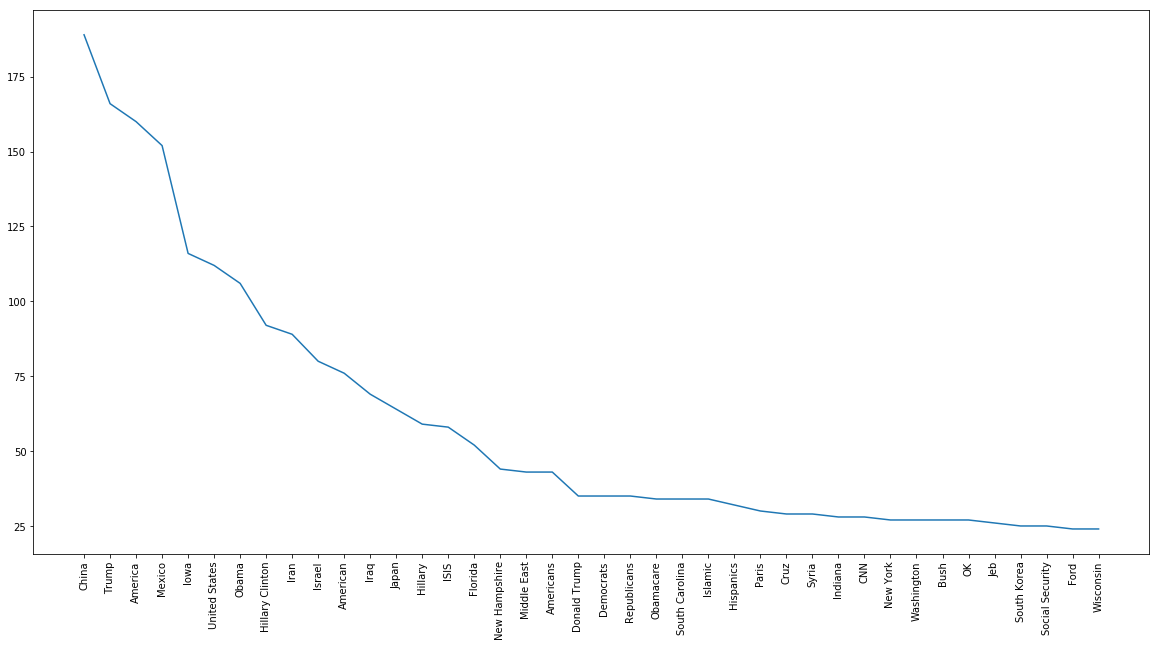

In [19]:
sorted_ner_map = [(u'China', 189), (u'Trump', 166), (u'America', 160), (u'Mexico', 152), (u'Iowa', 116), (u'United States', 112), (u'Obama', 106), (u'Hillary Clinton', 92), (u'Iran', 89), (u'Israel', 80), (u'American', 76), (u'Iraq', 69), (u'Japan', 64), (u'Hillary', 59), (u'ISIS', 58), (u'Florida', 52), (u'New Hampshire', 44), (u'Middle East', 43), (u'Americans', 43), (u'Donald Trump', 35), (u'Democrats', 35), (u'Republicans', 35), (u'Obamacare', 34), (u'South Carolina', 34), (u'Islamic', 34), (u'Hispanics', 32), (u'Paris', 30), (u'Cruz', 29), (u'Syria', 29), (u'Indiana', 28), (u'CNN', 28), (u'New York', 27), (u'Washington', 27), (u'Bush', 27), (u'OK', 27), (u'Jeb', 26), (u'South Korea', 25), (u'Social Security', 25), (u'Ford', 24), (u'Wisconsin', 24), (u'Saudi Arabia', 23), (u'Ivanka', 23), (u'Ted', 21), (u'Nevada', 20), (u'White House', 20), (u'US', 20), (u'NATO', 19), (u'Islam', 19), (u'Texas', 19), (u'Medicare', 19), (u'Republican', 19), (u'NAFTA', 19), (u'Clinton', 18), (u'Ted Cruz', 18), (u'Marco', 17), (u'California', 17), (u'Republican Party', 16), (u'Germany', 16), (u'NBC', 16), (u'Bergdahl', 15), (u'Carl Icahn', 15), (u'Ben Carson', 15), (u'Jeb Bush', 15), (u'Russia', 15), (u'America First', 14), (u'Christians', 14), (u'Chicago', 14), (u'Fox', 14), (u'Libya', 13), (u'Tennessee', 13), (u'Common Core', 13), (u'Donald', 13), (u'Rubio', 13), (u'Yemen', 13), (u'Ben', 13), (u'Muslim', 12), (u'Boeing', 12), (u'Orlando', 12), (u'The Apprentice', 12), (u'Trump Tower', 12), (u'Christian', 12), (u'Mexican', 12), (u'Tea Party', 11), (u'Merry Christmas', 11), (u'Kasich', 11), (u'Ohio', 11), (u'Putin', 11), (u'Mitt Romney', 11), (u'Jewish', 11), (u'Alabama', 11), (u'Los Angeles', 11), (u'Melania', 11), (u'Nashville', 11), (u'Oh', 11), (u'Chris', 11), (u'San Bernardino', 11), (u'Joe', 10), (u'New Jersey', 10), (u'Afghanistan', 10), (u'France', 10), (u'Pennsylvania', 10), (u'San Francisco', 10), (u'Nabisco', 10), (u'Carl', 10), (u'Walker', 10), (u'Mike Pence', 9), (u'John Deere', 9), (u'Romney', 9), (u'Jeff Sessions', 9), (u'SPEECH', 9), (u'Caterpillar', 9), (u'World Trade Center', 9), (u'God', 9), (u'New York Times', 9), (u'North Korea', 9), (u'Beada', 8), (u'Chinese', 8), (u'Muslims', 8), (u'Michigan', 8), (u'Hispanic', 8), (u'Veterans Administration', 8), (u'Bible', 8), (u'Georgia', 8), (u'Wall Street Journal', 8), (u'Senate', 8), (u'TPP', 8), (u'Monmouth', 8), (u'Cold War', 8), (u'Manhattan', 8), (u'George', 7), (u'Ukraine', 7), (u'Christie', 7), (u'Marco Rubio', 7), (u'Washington Bridge', 7), (u'Jared', 7), (u'Bernie Sanders', 7), (u'Atlantic City', 7), (u'Pennsylvania Avenue', 7), (u'Art of the Deal', 7), (u'Keystone Pipeline', 7), (u'Simon', 7), (u'Kate', 7), (u'Doral', 7), (u'Tom Brady', 7), (u'YOU LOOK', 7), (u'Radical Islam', 7), (u'Steve', 7), (u'Pfizer', 7), (u'Dallas', 7), (u'Canada', 6), (u'Supreme Court', 6), (u'South China', 6), (u'Europe', 6), (u'Trump ,', 6), (u'Bill Clinton', 6), (u'Patton', 6), (u'Pence', 6), (u'Sharon', 6), (u'MacArthur', 6), (u'Palestinian', 6), (u'Oklahoma', 6), (u'Univision', 6), (u'Democrat', 6), (u'North Carolina', 6), (u'Kerry', 6), (u'PAC', 6), (u'VA', 6), (u'Syrian', 6), (u'Sharia', 6), (u'Mobile', 6), (u'Mike', 6), (u'Komatsu', 6), (u'Scott', 6), (u'Jews', 5), (u'CBS', 5), (u'Benghazi', 5), (u'Chris Christie', 5), (u'Wall Street', 5), (u'Eric', 5), (u'Afghan', 5), (u'Bobby Knight', 5), (u'Asians', 5), (u'Sarah Palin', 5), (u'Time Magazine', 5), (u'Johnson', 5), (u'Sony', 5), (u'Ivy League', 5), (u'Qatar', 5), (u'Academy Awards', 5), (u'Internet', 5), (u'OH', 5), (u'Air Force', 5), (u'Ireland', 5), (u'David', 5), (u'Sweden', 5), (u'Scotland', 5), (u'Clintons', 5), (u'George Patton', 5), (u'Trump University', 5), (u'New Yorkers', 5), (u'Trans-Pacific Partnership', 5), (u'Jerry Falwell', 5), (u'United Nations', 5), (u'Trace', 5), (u'Bank of America', 5), (u'Western', 4), (u'Petraeus', 4), (u'Genesco', 4), (u'Norway', 4), (u'Arizona', 4), (u'Russians', 4), (u'Denmark', 4), (u'Tiffany', 4), (u'Don', 4), (u'Mitch McConnell', 4), (u'Dubai', 4), (u'Lindsey Graham', 4), (u'State Department', 4), (u'Rand Paul', 4), (u'IRS', 4), (u'Samsung', 4), (u'Don Rickles', 4), (u'Great Wall of China', 4), (u'CNBC', 4), (u'Medicaid', 4), (u'Dwight Eisenhower', 4), (u'Virginia', 4), (u'NRA', 4), (u'Earth', 4), (u'Reuters', 4), (u'Palestinians', 4), (u'Carson', 4), (u'WHO', 4), (u'Super PAC', 4), (u'Paul Ryan', 4), (u'Jamiel', 4), (u'Cleveland', 4), (u'Todd', 4), (u'The Snake', 4), (u'Am I', 4), (u'McCain', 4), (u'Des Moines', 4), (u'GSA', 4), (u'Bibi', 4), (u'Chuck Todd', 4), (u'Connecticut', 4), (u'Perry', 4), (u'Gulf', 4), (u'Mark', 4), (u'Lyin', 4), (u'Liberty University', 4), (u'Bill', 4), (u'Gitmo', 4), (u'Rush Limbaugh', 4), (u'Brooklyn', 4), (u'Vietnam', 4), (u'Bernie', 4), (u'Chelsea', 4), (u'Gulf States', 4), (u'INDIANA', 4), (u'Adam Scott', 4), (u'OK. So', 3), (u'JAPAN', 3), (u'Rand', 3), (u'Radical Islamic Terrorism', 3), (u'Turkey', 3), (u'Maryland', 3), (u'Made', 3), (u'Las Vegas', 3), (u'Constitution', 3), (u'S.', 3), (u'Tom', 3), (u'Cory', 3), (u'Old Post Office', 3), (u'Chuck', 3), (u'Mark Burnett', 3), (u'Trump Administration', 3), (u'Jerry', 3), (u'LG', 3), (u'LA', 3), (u'HIM', 3), (u'Bill Kristol', 3), (u'Apple', 3), (u'Brussels', 3), (u'Queens', 3), (u'World Trade Organization', 3), (u'LOOK', 3), (u'Treasury', 3), (u'Billy Graham', 3), (u'Franklin Graham', 3), (u'Asia', 3), (u'Congress', 3), (u'SEC', 3), (u'See', 3), (u'AAA', 3), (u'Saudis', 3), (u'Miss Universe', 3), (u'Justice Roberts', 3), (u'Sarah', 3), (u'Palestine', 3), (u'European', 3), (u'Applause', 3), (u'Senators', 3), (u'Mexican Government', 3), (u'Kanye West', 3), (u'NASCAR', 3), (u'LGBT', 3), (u'RNC', 3), (u'Bob Dole', 3), (u'English', 3), (u'John McCain', 3), (u'Drudge', 3), (u'Phil', 3), (u'Pew Research', 3), (u'Bloomberg', 3), (u'WTO', 3), (u'Gadhafi', 3), (u'Turnberry', 3), (u'John Wayne', 3), (u'John Kerry', 3), (u'Pakistan', 3), (u'Massachusetts', 3), (u'The Art of the Deal', 3), (u'Corey', 3), (u'Fifth Avenue', 3), (u'Baltimore', 3), (u'Pearl Harbor', 3), (u'Persians', 3), (u'Border Patrol', 3), (u'Harleys', 3), (u'FBI', 3), (u'Melissa', 3), (u'Mary', 3), (u'Lyndon Johnson', 3), (u'Barron', 3), (u'Schuster', 2), (u'Mitt', 2), (u'Donald J. Trump', 2), (u'State of Israel', 2), (u'Euro', 2), (u'Al Green', 2), (u'Newt Gingrich', 2), (u'Australia', 2), (u'LAX', 2), (u'Lebanon', 2), (u'Merkel', 2), (u'Citibank', 2), (u'United States of America', 2), (u'Burbank', 2), (u'ME', 2), (u'Obama-Clinton', 2), (u'Hamas', 2), (u'African-Americans', 2), (u'Robert', 2), (u'Phil Ruffin', 2), (u'Telemundo', 2), (u'Syrians', 2), (u'Melissa Young', 2), (u'John Rich', 2), (u'George Will', 2), (u'Potomac', 2), (u'Jewish State', 2), (u'Ernie', 2), (u'Trump International Hotel', 2), (u'Forbes', 2), (u"I'M", 2), (u'Phoenix', 2), (u'ABC', 2), (u'Director of National Intelligence', 2), (u'Japanese', 2), (u'Douglas MacArthur', 2), (u'World War III', 2), (u'Minnesota', 2), (u'West Virginia', 2), (u'Ike', 2), (u'Mexican-American', 2), (u"THEY'RE", 2), (u'Miami', 2), (u'Adam', 2), (u'YEMEN', 2), (u'South Dakota', 2), (u'Grand Ole Opry', 2), (u'Liberty', 2), (u'Jefferson', 2), (u'Hollywood', 2), (u'Presbyterian', 2), (u'Mercedes Benz', 2), (u'Gaddafi', 2), (u'Boston', 2), (u'General Services', 2), (u'Yale', 2), (u'Elton John', 2), (u'Goldman Sachs', 2), (u'Wounded Warriors', 2), (u'John McLaughlin', 2), (u'Hebrew', 2), (u'OK.', 2), (u'Lorne Michaels', 2), (u'LOU', 2), (u'General Services Administration', 2), (u'Egypt', 2), (u'Democratic Party', 2), (u'Homeland Security', 2), (u'Komatsus', 2), (u'Center for Security Policy', 2), (u'Jose Reyes', 2), (u'A.', 2), (u'Harvard', 2), (u'IRAN', 2), (u'UNITED STATES', 2), (u'Bonwit Teller', 2), (u'PP', 2), (u'New York City', 2), (u'Abraham Lincoln', 2), (u'PENNSYLVANIA', 2), (u'Des Moines Register', 2), (u'Wolf Blitzer', 2), (u'New Mexico', 2), (u'Mar-A-Lago', 2), (u'Trump PAC', 2), (u'Midwest', 2), (u'PIGGY BANK', 2), (u'Oreos', 2), (u'Reagan', 2), (u'Clint Black', 2), (u'Carrier', 2), (u'IRAQ', 2), (u'Somali', 2), (u'Hope', 2), (u'Ronald Reagan', 2), (u'Soviet Union', 2), (u'England', 2), (u'The New York Times', 2), (u'Club for Growth', 2), (u'Republican Governors Association', 2), (u'John Harwood', 2), (u'Taliban', 2), (u'Trojan Horse', 2), (u'Person of the Year', 2), (u'CHICAGO', 2), (u'Secret Service', 2), (u'Barack Obama', 2), (u'Latin America', 2), (u'Ellen', 2), (u'Harwood', 2), (u'Super PACs', 2), (u'Cuba', 2), (u'Pittsburgh', 2), (u'Montana', 2), (u'The Tea Party', 2), (u'Caesar', 2), (u'Quinnipiac', 2), (u'Boston Bombers', 2), (u'Christianity', 2), (u'South America', 2), (u'OK. We', 2), (u'Young', 2), (u'Arkansas', 2), (u'Janet Yellen', 2), (u'Senate Subcommittee', 2), (u'African-American', 2), (u'GOP', 2), (u'Grand Hyatt Hotel', 2), (u'World Trade Centers', 2), (u'DREAMERs', 2), (u'OK. I', 2), (u'MR. TRUMP', 2), (u'WELL', 2), (u'Ramos', 2), (u'South', 2), (u'Al', 2), (u'LA.', 1), (u'Interpol', 1), (u'FLORIDA', 1), (u'Abbas', 1), (u'Lara', 1), (u'Hatzalah', 1), (u'Olympics', 1), (u'FEC', 1), (u'Gary Johnson', 1), (u'Louisiana', 1), (u'Crippled America', 1), (u'DALLAS', 1), (u'Trump National Golf Club', 1), (u'Netanyahu', 1), (u'Donald Trump--there', 1), (u'Union', 1), (u'OHIO', 1), (u'Atlanta', 1), (u'Trump Train', 1), (u'Ding', 1), (u'Oreo', 1), (u'United State', 1), (u'Trump Building', 1), (u'Waldorf Astoria', 1), (u'S. Attorney', 1), (u'Washington Times', 1), (u'Carrier Air Conditioning', 1), (u'Henry', 1), (u'Massachusetts I', 1), (u'Golan Heights', 1), (u'Lewandowski', 1), (u'World Trade', 1), (u'PACS', 1), (u'Carly', 1), (u'FRANCE', 1), (u'Wollman', 1), (u'Washington I', 1), (u'RICHARD PETTY', 1), (u'RICH', 1), (u'Woman of the Year', 1), (u'Northern Marianas Islands', 1), (u'MAN', 1), (u'Gaza Strip', 1), (u'Rolls-Royce , I', 1), (u'Rich', 1), (u'African- Americans', 1), (u'Romneycare', 1), (u'Fed', 1), (u'King of Jordan', 1), (u'Matt Drudge', 1), (u'GREAT STATE', 1), (u'TEN', 1), (u'Ferguson', 1), (u'LOS ANGELES', 1), (u'Maryanne', 1), (u'State of Pennsylvania', 1), (u'Rush', 1), (u'Reince', 1), (u'Youngstown', 1), (u'House Republican Conference', 1), (u'Bill Gates', 1), (u'World War', 1), (u'Iowa State', 1), (u'NUCLEAR', 1), (u'Miss Wisconsin', 1), (u'Dan', 1), (u'Jacobs', 1), (u'Oval Office', 1), (u'Truly', 1), (u'Ferry Point', 1), (u'Nice', 1), (u'Sanders', 1), (u'Columbus', 1), (u'Sarasota', 1), (u'Cadillac', 1), (u'Slate', 1), (u'OK. Who', 1), (u'Ralph Torres', 1), (u'Scott Pelley', 1), (u'Steve King', 1), (u'The Bank of America', 1), (u'Capitol Building', 1), (u'Americas', 1), (u'Person', 1), (u'Equal Living', 1), (u'Brad', 1), (u'Disney World', 1), (u'Libyan', 1), (u'Department of Justice , State', 1), (u'OK. But', 1), (u'WHO IS AS CROOKED AS', 1), (u'Brexit', 1), (u'Israeli', 1), (u'Jack Nicklaus', 1), (u'Boeing 747', 1), (u'THIS', 1), (u'Robin Hood', 1), (u'Emmy for', 1), (u'Phil I', 1), (u'Canadian', 1), (u'Airbus jets', 1), (u'Barak', 1), (u'Donald I', 1), (u'Trojan', 1), (u'The Art of the Deal PAC', 1), (u'Ryan', 1), (u'Nebraska', 1), (u'World Report', 1), (u'Swiss', 1), (u'SAN BERNARDINO', 1), (u'SMART', 1), (u'St. Louis', 1), (u'Radical Islamic', 1), (u'American Airlines Center', 1), (u'Greece', 1), (u'Eaton', 1), (u'Art of the Deal PAC', 1), (u'TRILLION', 1), (u'Aye', 1), (u'Hezbollah', 1), (u'Silicon Valley', 1), (u'Illinois', 1), (u'Gen. MacArthur', 1), (u'SON', 1), (u'MIT', 1), (u'Bowe', 1), (u'S. Cole', 1), (u'LaGuardia', 1), (u'Trump files bankruptcy', 1), (u'PRO', 1), (u'ISIS the', 1), (u'Bill Rancic', 1), (u'Spain', 1), (u'AMVETS', 1), (u'Indianapolis', 1), (u'MINNESOTA', 1), (u"THEY'LL SAY", 1), (u'Reince Priebus', 1), (u'Monmouth University', 1), (u'Pulse Nightclub', 1), (u'Vatican', 1), (u'Ayeyeye', 1), (u'Skip Iowa', 1), (u'Dwight', 1), (u'India', 1), (u'Becky Quick', 1), (u'Calderon', 1), (u'Sharia Law', 1), (u'Kenya', 1), (u'Farsi', 1), (u'Ray', 1), (u'New England Patriots', 1), (u'Czech Republic', 1), (u'Palestinian Authority', 1), (u'CNN and I', 1), (u'Caterpillar Tractor', 1), (u'See Club for Growth', 1), (u'MIKE', 1), (u'Elizabeth', 1), (u'Second World War', 1), (u'Trade Act of', 1), (u'BIG', 1), (u'Harvard Law School', 1), (u'Jeffress', 1), (u'Jay Leno', 1), (u'Charlie Rose', 1), (u'Summer of Trump', 1), (u'Steve Burke', 1), (u'Todd Palin', 1), (u'Citizens United', 1), (u'Miss Universe Pageant', 1), (u'OK. Then I', 1), (u'Carly Fiorina', 1), (u'Paul', 1), (u'MEXICO', 1), (u'Public Broadcasting System', 1), (u'AMERICAN PEOPLE', 1), (u'East Coast', 1), (u'Trace Adkins', 1), (u'Kennedy Airport', 1), (u'Eugene Washington', 1), (u'Brazil', 1), (u'Bridges', 1), (u'Joe Biden', 1), (u'Swenden', 1), (u'AIDS', 1), (u'MSNBC', 1), (u'American Cancer Society', 1), (u'Ed Koch', 1), (u'Kristol', 1), (u'BUILD SAFE', 1), (u'Guardian', 1), (u'New England', 1), (u'Qatar--which', 1), (u'Economic Policy Institute', 1), (u'LGBT Community', 1), (u'NO. NO', 1), (u'Lincoln', 1), (u'Bing', 1), (u'Marine Corps Law Enforcement Foundation', 1), (u'TSA', 1), (u'Jamiel Shaw', 1), (u'Whitewater', 1), (u'K-9 Corps Inc.', 1), (u'Central Park', 1), (u'Steinle', 1), (u'CHINA', 1), (u'Arpaio', 1), (u'K-', 1), (u'Barack Hussein Obama', 1), (u'Gravis', 1), (u'Taylor Allen Force', 1), (u'Wharton School of Finance', 1), (u'Larry Kudlow', 1), (u'Park Avenue', 1), (u'Emerson', 1), (u'Air Force One', 1), (u'David Letterman', 1), (u'S. Senator', 1), (u'Jones', 1), (u'Steel City', 1), (u'Fortune Magazine', 1), (u'Bank of America Building', 1), (u'Kentucky', 1), (u'Pan the crowd', 1), (u'Heidi', 1), (u'Logic', 1), (u'Paris I', 1), (u'" No. People', 1), (u'OK. He', 1), (u'Jefferson Memorial', 1), (u'T. NOBODY', 1), (u'Miss USA', 1), (u'PERSIANS', 1), (u'Copenhagen', 1), (u'South China Sea', 1), (u'Vincente Fox', 1), (u'NICE', 1), (u"BILL O'REILLY", 1), (u'Scott Brown', 1), (u'ORLANDO', 1), (u'Chris Matthews', 1), (u'Alexander Hamilton', 1), (u'Pam Bondi', 1), (u'Randy', 1), (u'Sharons', 1), (u'Nationwide', 1), (u'Vanessa', 1), (u'French', 1), (u'Fred', 1), (u'Hilton Head', 1), (u'Tanzania', 1), (u'YOUNG MAN', 1), (u'FAVOR', 1), (u'Memorial Day', 1), (u'Al Qaeda', 1), (u'Jupiter', 1), (u'THE PRESS', 1), (u'Comcast', 1), (u'McLaughlin Report', 1), (u'Trump National Doral', 1), (u'Gorbachev', 1), (u'WE OWE', 1), (u'RGA', 1), (u'Muslim Brotherhood', 1), (u'Favored', 1), (u'Pulse Night Club', 1), (u"WE'RE", 1), (u'Transpacific-Partnership', 1), (u'THIRD-WORLD COUNTRY', 1), (u'THE FACT', 1), (u'Second Amendment', 1), (u'TransPacific Partnership', 1), (u'Bronx', 1), (u'LeBron', 1), (u'BADEN EMMY', 1), (u'Arafat', 1), (u'American Great Again', 1), (u'Lindsey', 1), (u'CROOKED AS', 1), (u'Karen', 1), (u'Navy', 1), (u'B-52s', 1), (u'Truman', 1), (u'Departments of Justice , State', 1), (u'Jeremy', 1), (u'Richard Nixon', 1), (u'Center for National Interest for', 1), (u'REPUBLICAN', 1), (u'Marine Law Enforcement', 1), (u'SYRIA', 1), (u'Louise', 1), (u'Southern', 1), (u'Macy', 1), (u'Marine Corps', 1), (u'Osama bin Laden', 1), (u'Tokyo', 1), (u'Poland', 1), (u'Liberty College', 1), (u'Jr. Liberty University', 1), (u'Guantanamo', 1), (u'Ordierno', 1), (u'WAR', 1), (u'Rudy Giuliani', 1), (u'Deal', 1), (u'McDonald', 1), (u'Section 201', 1), (u'Environmental Protection Agency', 1), (u'RICHARD ENDORSED', 1), (u'BiBi', 1), (u'Secret Service Agent', 1), (u'Real change', 1), (u'Nah', 1), (u'Gaza', 1), (u'Bibi Netanyahu', 1), (u'1290 Avenue of the Americas', 1), (u'SUDDEN', 1), (u'Trans-Pacific', 1), (u'Miss Teen USA', 1), (u'SWISS', 1), (u'DONALD TRUMP', 1), (u'Becky', 1), (u'Patrick Murray', 1), (u'FAT', 1), (u'REINCE PRIEBUS', 1), (u'Camp', 1), (u'Purdue', 1), (u'Eaton Corp.', 1), (u'Harry Truman', 1), (u'1290 Ave.', 1), (u'Maine', 1), (u'SNL', 1), (u'Jerusalem', 1), (u'Democrat Party', 1), (u'Fox had', 1), (u'ISRAEL', 1), (u'Mexicans', 1), (u'Mike Huckabee', 1), (u'Steve Wynn', 1), (u'Vladimir Putin', 1), (u'C. We', 1), (u'TRADER', 1), (u'Arab', 1), (u'La Guardia Airport', 1), (u'Jobs', 1), (u'VA. He', 1), (u'Super PACs I', 1), (u'The Old Post Office', 1), (u'American Hero', 1), (u"WE'RE WINNING", 1), (u'Mar-a-Lago', 1), (u'Bushes', 1), (u'Graydon Carter', 1), (u'James', 1), (u'Senate Subcommittee on Immigration', 1), (u'Harley', 1), (u'Keystone', 1), (u'Spoiled', 1), (u'West Bank', 1), (u'Supreme Leader', 1), (u'Honey', 1), (u'Biden', 1), (u'Republican National Committee', 1), (u'Pentagon', 1), (u'OR', 1), (u'Boom', 1), (u'Viet Nam', 1), (u'United Nations Security Council', 1), (u'George Stephanopoulos', 1), (u'VICENTE FOX', 1), (u'British Open', 1), (u'M. TRUMP', 1), (u'Katie', 1), (u'Gov. Walker', 1), (u'qatar', 1), (u'S. News', 1), (u'Lee', 1), (u'Department of Education', 1), (u'DESERTER', 1), (u'Stanford', 1), (u'GITMO', 1), (u'Facebook', 1), (u'FELLAS', 1), (u'AMT', 1), (u'Syracuse', 1), (u'No. OK. No body', 1), (u'Heaven', 1), (u'Dwight D. Eisenhower', 1), (u'North America', 1), (u'MIDDLE EAST', 1), (u'C. Many', 1), (u'Empire State', 1), (u'West Point', 1), (u'CLINTON', 1), (u'Trump Wall', 1), (u'Fine', 1), (u'UN', 1), (u'Department of State , State Department', 1), (u'Ike Perlmutter', 1), (u'D-Day', 1), (u'Chelsea Cooley', 1), (u'Manassas', 1), (u'Rasmussen', 1), (u'OPEC', 1), (u'Ada', 1), (u'George Washington', 1), (u'Ruth', 1), (u'Los Angeles Times', 1), (u'Trump Presidency', 1), (u'Army', 1), (u'Poughkeepsie', 1), (u'Chevrolet', 1), (u'Green Bay', 1), (u'The Times', 1), (u'wall I', 1), (u'Mavericks', 1), (u'Mosque', 1), (u'Well', 1), (u'Google', 1), (u'African American', 1), (u'Trade Expansion Act of 1962', 1), (u'Jeff', 1), (u'Twitter', 1), (u'Murray', 1), (u'Britain', 1), (u'Fortune 500', 1), (u'Legitimately', 1), (u'Ford Motor Company', 1), (u"THE PEOPLE OF INDIANA CAN'T STAND IT", 1), (u'I. TRUMP', 1), (u'Olmert', 1), (u'Security Council', 1), (u'Darling', 1), (u'Romney I', 1), (u'Veterans', 1), (u'Nazis', 1), (u'Odierno', 1), (u'Kushner', 1), (u'Princeton', 1), (u'Tiffany Location', 1), (u'Israelis', 1), (u'Katie Tur', 1), (u'F-22s', 1), (u'Obama Administration', 1), (u'Islamic Jihad', 1), (u'AP', 1), (u'North American Free Trade Agreement', 1), (u'Saddam Hussein', 1), (u'Charles', 1), (u'Mr. Singer', 1), (u'Justice Department', 1), (u'Asian', 1), (u'Spanish', 1), (u'Honestly', 1), (u'Times', 1), (u'Trump 48', 1)]

# extract two lists
strs, counts = zip(*sorted_ner_map[0:40])


import matplotlib.pyplot as plt 
import numpy as np 

plt.rcParams["figure.figsize"] = (20, 10)
plt.xticks(np.arange(len(strs)), strs, rotation = 'vertical')
plt.plot(counts)
plt.show()